By scikit-learn:
[1.96625031]
2.8538099452225367
Run time:0.001993894577026367

By Batch Gradient Descent:
1.9934727911676395
1.0646907781921153
Run time:0.0638272762298584

By Stochastic Gradient Descent:
2.1023347043757545
2.6053857643205616
Run time:0.44808530807495117

By Mini Batch Gradient Descent:
1.9524226938801585
1.1420309028154436
Run time:0.11565637588500977



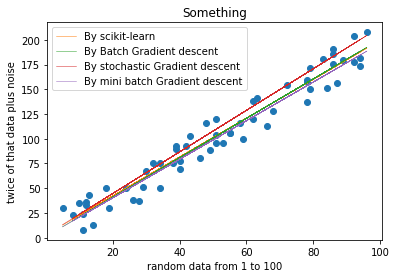

In [24]:
import numpy as np 
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import time


data=60
epochs=1000

def GD(x, y, alpha=0.0001, m=3,c=1):  
    for i in range(epochs):
        cost=np.sum(np.square(y-(m*x+c)))/data   
        mgrad=np.sum(-2*x*(y-(m*x+c)))/data      
        cgrad=np.sum(-2*(y-(m*x+c)))/data          
        m=m-alpha*mgrad                                     
        c=c-alpha*cgrad                                     
    return m, c


def SGD(x, y, alpha=0.0001, m=3,c=1):
    for i in range(epochs):
        random_order=np.random.permutation(data)    
        for j in range(data):
            mgrad=-2*x[random_order[j]]*(y[random_order[j]]-(m*x[random_order[j]]+c))     
            cgrad=-2*(y[random_order[j]]-(m*x[random_order[j]]+c))                   
            m=m-alpha*mgrad                                                
            c=c-alpha*cgrad                                                
    return m, c

def mBGD(x, y, batch=20, alpha=0.0001, m=3,c=1):
    
    batch_count=math.floor(data/batch)
    
    for i in range(epochs):
        for j in range(batch_count):   
            mgrad=np.sum(-2*x[j*batch:(j+1)*batch]*(y[j*batch:(j+1)*batch]-(m*x[j*batch:(j+1)*batch]+c)))/batch         
            cgrad=np.sum(-2*(y[j*batch:(j+1)*batch]-(m*x[j*batch:(j+1)*batch]+c)))/batch                 
            m=m-alpha*mgrad                                                    
            c=c-alpha*cgrad                                                    
    return m,c


x=np.random.randint(1, 100, size=data)
y=[]
for i in range(0,data):
    y.append(2*x[i]+np.random.uniform(-20.0, 20.0))

sklstart=time.time()
skl=LinearRegression().fit(x.reshape(-1,1),y)
yskl=skl.predict(x.reshape(-1,1))
sklend=time.time()


GDstart=time.time()
m_GD, c_GD=GD(x, y)
y_GD=m_GD*x+c_GD
GDend=time.time()


SGDstart=time.time()
m_SGD, c_SGD=SGD(x, y)
y_SGD=m_SGD*x+c_SGD
SGDend=time.time()


mBGDstart=time.time()
m_mBGD, c_mBGD=mBGD(x, y)
y_mBGD=m_mBGD*x+c_mBGD
mBGDend=time.time()

print('By scikit-learn:')
print(skl.coef_)
print(skl.intercept_)
print('Run time:'+(str)(sklend-sklstart))
print()
print('By Batch Gradient Descent:')
print(m_GD)
print(c_GD)
print('Run time:'+(str)(GDend-GDstart))
print()
print('By Stochastic Gradient Descent:')
print(m_SGD)
print(c_SGD)
print('Run time:'+(str)(SGDend-SGDstart))
print()
print('By Mini Batch Gradient Descent:')
print(m_mBGD)
print(c_mBGD)
print('Run time:'+(str)(mBGDend-mBGDstart))
print()


plt.plot(x, y,'o')
plt.plot(x, yskl, label='By scikit-learn', linewidth=0.5)
plt.plot(x, y_GD, label='By Batch Gradient descent', linewidth=0.5)
plt.plot(x, y_SGD, label='By stochastic Gradient descent', linewidth=0.5)
plt.plot(x, y_mBGD, label='By mini batch Gradient descent', linewidth=0.5)
plt.xlabel('random data from 1 to 100')
plt.ylabel('twice of that data plus noise')
plt.title('GD')
plt.legend()
plt.show()